In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = './src/assessments/statistics/exercise3/Pasta1.xlsx'
raw_df = pd.read_excel(file_path)
raw_df

,Chave,Ticker,MesAno,Reported,Estimate,DivPA,VPA,Receita,ValorMerc,Ativo,PC,PNC,PL
0,AALR303/2017,AALR3,03/2017,0.058,0.080,0.0,10.306391,259277.0,1793917.0,2218670.0,429271.0,564989.0,1182905
1,AALR303/2018,AALR3,03/2018,0.073,0.080,NaN,10.408744,263142.0,1902885.0,2274483.0,375351.0,631247.0,NaN
2,AALR303/2019,AALR3,03/2019,0.084,0.110,0.0,10.697692,261845.0,1714254.0,2429751.0,407320.0,718936.0,NaN
3,AALR306/2017,AALR3,06/2017,0.034,0.125,0.0,10.323341,529682.0,2070042.0,2270885.0,471114.0,539440.0,1218344
4,AALR306/2018,AALR3,06/2018,0.032,0.070,0.0,10.462927,538706.0,1545946.0,2263315.0,404495.0,582234.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,YDUQ312/2015,YDUQ3,12/2015,0.176,0.334,NaN,8.709215,2939422.0,4293643.0,4360083.0,746183.0,933308.0,2680592
4037,YDUQ312/2016,YDUQ3,12/2016,0.462,0.235,NaN,7.894572,3184505.0,4872688.0,4141152.0,937314.0,769165.0,NaN
4038,YDUQ312/2017,YDUQ3,12/2017,0.075,0.350,NaN,8.975281,3378979.0,10148502.0,4021095.0,842944.0,400894.0,NaN
4039,YDUQ312/2018,YDUQ3,12/2018,0.054,0.460,NaN,8.634778,3619377.0,7130685.0,4102463.0,1289100.0,221954.0,2591409


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Chave      4041 non-null   object 
 1   Ticker     4041 non-null   object 
 2   MesAno     4041 non-null   object 
 3   Reported   3943 non-null   float64
 4   Estimate   4041 non-null   float64
 5   DivPA      2628 non-null   float64
 6   VPA        3895 non-null   float64
 7   Receita    3581 non-null   float64
 8   ValorMerc  3923 non-null   float64
 9   Ativo      3861 non-null   float64
 10  PC         3850 non-null   float64
 11  PNC        3624 non-null   float64
 12  PL         2627 non-null   object 
dtypes: float64(9), object(4)
memory usage: 410.5+ KB


# Patrimonio liquido como num

In [4]:
renamed_df = raw_df.copy(deep=True)
renamed_df.columns = ['chave', 'codigo', 'data', 'reported', 'estimate', 'dividendos_por_acao',
              'valor_por_acao', 'receita', 'valor_mercardo', 'ativo', 'passivo_circulante', 'passivo_nao_circulante', 'patrimonio_liquido']
def replace_to_num(x):
  if type(x) == str:
    return float(x.replace("'", '').replace(',', '.'))
  return x

renamed_df['patrimonio_liquido'] = renamed_df['patrimonio_liquido'].map(replace_to_num)
renamed_df

,chave,codigo,data,reported,estimate,dividendos_por_acao,valor_por_acao,receita,valor_mercardo,ativo,passivo_circulante,passivo_nao_circulante,patrimonio_liquido
0,AALR303/2017,AALR3,03/2017,0.058,0.080,0.0,10.306391,259277.0,1793917.0,2218670.0,429271.0,564989.0,1182905.0
1,AALR303/2018,AALR3,03/2018,0.073,0.080,NaN,10.408744,263142.0,1902885.0,2274483.0,375351.0,631247.0,NaN
2,AALR303/2019,AALR3,03/2019,0.084,0.110,0.0,10.697692,261845.0,1714254.0,2429751.0,407320.0,718936.0,NaN
3,AALR306/2017,AALR3,06/2017,0.034,0.125,0.0,10.323341,529682.0,2070042.0,2270885.0,471114.0,539440.0,1218344.0
4,AALR306/2018,AALR3,06/2018,0.032,0.070,0.0,10.462927,538706.0,1545946.0,2263315.0,404495.0,582234.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,YDUQ312/2015,YDUQ3,12/2015,0.176,0.334,NaN,8.709215,2939422.0,4293643.0,4360083.0,746183.0,933308.0,2680592.0
4037,YDUQ312/2016,YDUQ3,12/2016,0.462,0.235,NaN,7.894572,3184505.0,4872688.0,4141152.0,937314.0,769165.0,NaN
4038,YDUQ312/2017,YDUQ3,12/2017,0.075,0.350,NaN,8.975281,3378979.0,10148502.0,4021095.0,842944.0,400894.0,NaN
4039,YDUQ312/2018,YDUQ3,12/2018,0.054,0.460,NaN,8.634778,3619377.0,7130685.0,4102463.0,1289100.0,221954.0,2591409.0


In [5]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chave                   4041 non-null   object 
 1   codigo                  4041 non-null   object 
 2   data                    4041 non-null   object 
 3   reported                3943 non-null   float64
 4   estimate                4041 non-null   float64
 5   dividendos_por_acao     2628 non-null   float64
 6   valor_por_acao          3895 non-null   float64
 7   receita                 3581 non-null   float64
 8   valor_mercardo          3923 non-null   float64
 9   ativo                   3861 non-null   float64
 10  passivo_circulante      3850 non-null   float64
 11  passivo_nao_circulante  3624 non-null   float64
 12  patrimonio_liquido      2627 non-null   float64
dtypes: float64(10), object(3)
memory usage: 410.5+ KB


# Dados nulos

In [6]:
renamed_df.isnull().sum()

chave                        0
codigo                       0
data                         0
reported                    98
estimate                     0
dividendos_por_acao       1413
valor_por_acao             146
receita                    460
valor_mercardo             118
ativo                      180
passivo_circulante         191
passivo_nao_circulante     417
patrimonio_liquido        1414
dtype: int64

# Criando colunas auxiliares

In [7]:
df = renamed_df.copy(deep=True)

df['erro_analista'] = df['reported'] - df['estimate']
df['mes'] = df['data'].map(lambda x: int(x.split('/')[0]))
df['ano'] = df['data'].map(lambda x: int(x.split('/')[1]))
df['endividamento'] = (df['passivo_circulante'] + df['passivo_nao_circulante'])/df['ativo']
df['receita_ativo'] = df['receita']/df['ativo']
df['ln_ativo'] = np.log(df['ativo'])
df

,chave,codigo,data,reported,estimate,dividendos_por_acao,valor_por_acao,receita,valor_mercardo,ativo,passivo_circulante,passivo_nao_circulante,patrimonio_liquido,erro_analista,mes,ano,endividamento,receita_ativo,ln_ativo
0,AALR303/2017,AALR3,03/2017,0.058,0.080,0.0,10.306391,259277.0,1793917.0,2218670.0,429271.0,564989.0,1182905.0,-0.022,3,2017,0.448133,0.116861,14.612418
1,AALR303/2018,AALR3,03/2018,0.073,0.080,NaN,10.408744,263142.0,1902885.0,2274483.0,375351.0,631247.0,NaN,-0.007,3,2018,0.442561,0.115693,14.637263
2,AALR303/2019,AALR3,03/2019,0.084,0.110,0.0,10.697692,261845.0,1714254.0,2429751.0,407320.0,718936.0,NaN,-0.026,3,2019,0.463527,0.107766,14.703299
3,AALR306/2017,AALR3,06/2017,0.034,0.125,0.0,10.323341,529682.0,2070042.0,2270885.0,471114.0,539440.0,1218344.0,-0.091,6,2017,0.445004,0.233249,14.635680
4,AALR306/2018,AALR3,06/2018,0.032,0.070,0.0,10.462927,538706.0,1545946.0,2263315.0,404495.0,582234.0,NaN,-0.038,6,2018,0.435966,0.238016,14.632341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,YDUQ312/2015,YDUQ3,12/2015,0.176,0.334,NaN,8.709215,2939422.0,4293643.0,4360083.0,746183.0,933308.0,2680592.0,-0.158,12,2015,0.385197,0.674167,15.288002
4037,YDUQ312/2016,YDUQ3,12/2016,0.462,0.235,NaN,7.894572,3184505.0,4872688.0,4141152.0,937314.0,769165.0,NaN,0.227,12,2016,0.412078,0.768990,15.236485
4038,YDUQ312/2017,YDUQ3,12/2017,0.075,0.350,NaN,8.975281,3378979.0,10148502.0,4021095.0,842944.0,400894.0,NaN,-0.275,12,2017,0.309328,0.840313,15.207065
4039,YDUQ312/2018,YDUQ3,12/2018,0.054,0.460,NaN,8.634778,3619377.0,7130685.0,4102463.0,1289100.0,221954.0,2591409.0,-0.406,12,2018,0.368328,0.882245,15.227098


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chave                   4041 non-null   object 
 1   codigo                  4041 non-null   object 
 2   data                    4041 non-null   object 
 3   reported                3943 non-null   float64
 4   estimate                4041 non-null   float64
 5   dividendos_por_acao     2628 non-null   float64
 6   valor_por_acao          3895 non-null   float64
 7   receita                 3581 non-null   float64
 8   valor_mercardo          3923 non-null   float64
 9   ativo                   3861 non-null   float64
 10  passivo_circulante      3850 non-null   float64
 11  passivo_nao_circulante  3624 non-null   float64
 12  patrimonio_liquido      2627 non-null   float64
 13  erro_analista           3943 non-null   float64
 14  mes                     4041 non-null   

# Checando outliers pré-tratamento

In [9]:
def is_outlier(value: float, column:str)->int:
  outlier_criteria = 3 * np.std(df[column])
  if value > (df[column].mean() + outlier_criteria):
    return 1
  if value < (df[column].mean() - outlier_criteria):
    return -1
  return 0

outliers_df = pd.DataFrame([df[col].map(lambda x: is_outlier(x, col)) for col in df.drop(['chave', 'codigo', 'data'], axis=1).columns]).transpose()
outliers_df

,reported,estimate,dividendos_por_acao,valor_por_acao,receita,valor_mercardo,ativo,passivo_circulante,passivo_nao_circulante,patrimonio_liquido,erro_analista,mes,ano,endividamento,receita_ativo,ln_ativo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
outliers_df.describe(percentiles=[0.01, 0.99])

,reported,estimate,dividendos_por_acao,valor_por_acao,receita,valor_mercardo,ativo,passivo_circulante,passivo_nao_circulante,patrimonio_liquido,erro_analista,mes,ano,endividamento,receita_ativo,ln_ativo
count,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.0,4041.0,4041.000000,4041.000000,4041.00000
mean,-0.001732,-0.002970,0.001732,0.004207,0.015343,0.029696,0.034892,0.029448,0.011878,0.014600,-0.000742,0.0,0.0,0.007176,0.014353,0.00099
std,0.064845,0.070297,0.041589,0.064732,0.122927,0.169767,0.183530,0.169080,0.108352,0.119961,0.052175,0.0,0.0,0.084420,0.118955,0.03145
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.000000,0.000000,0.00000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000
99%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.00000


# Correlações pré-tratamento

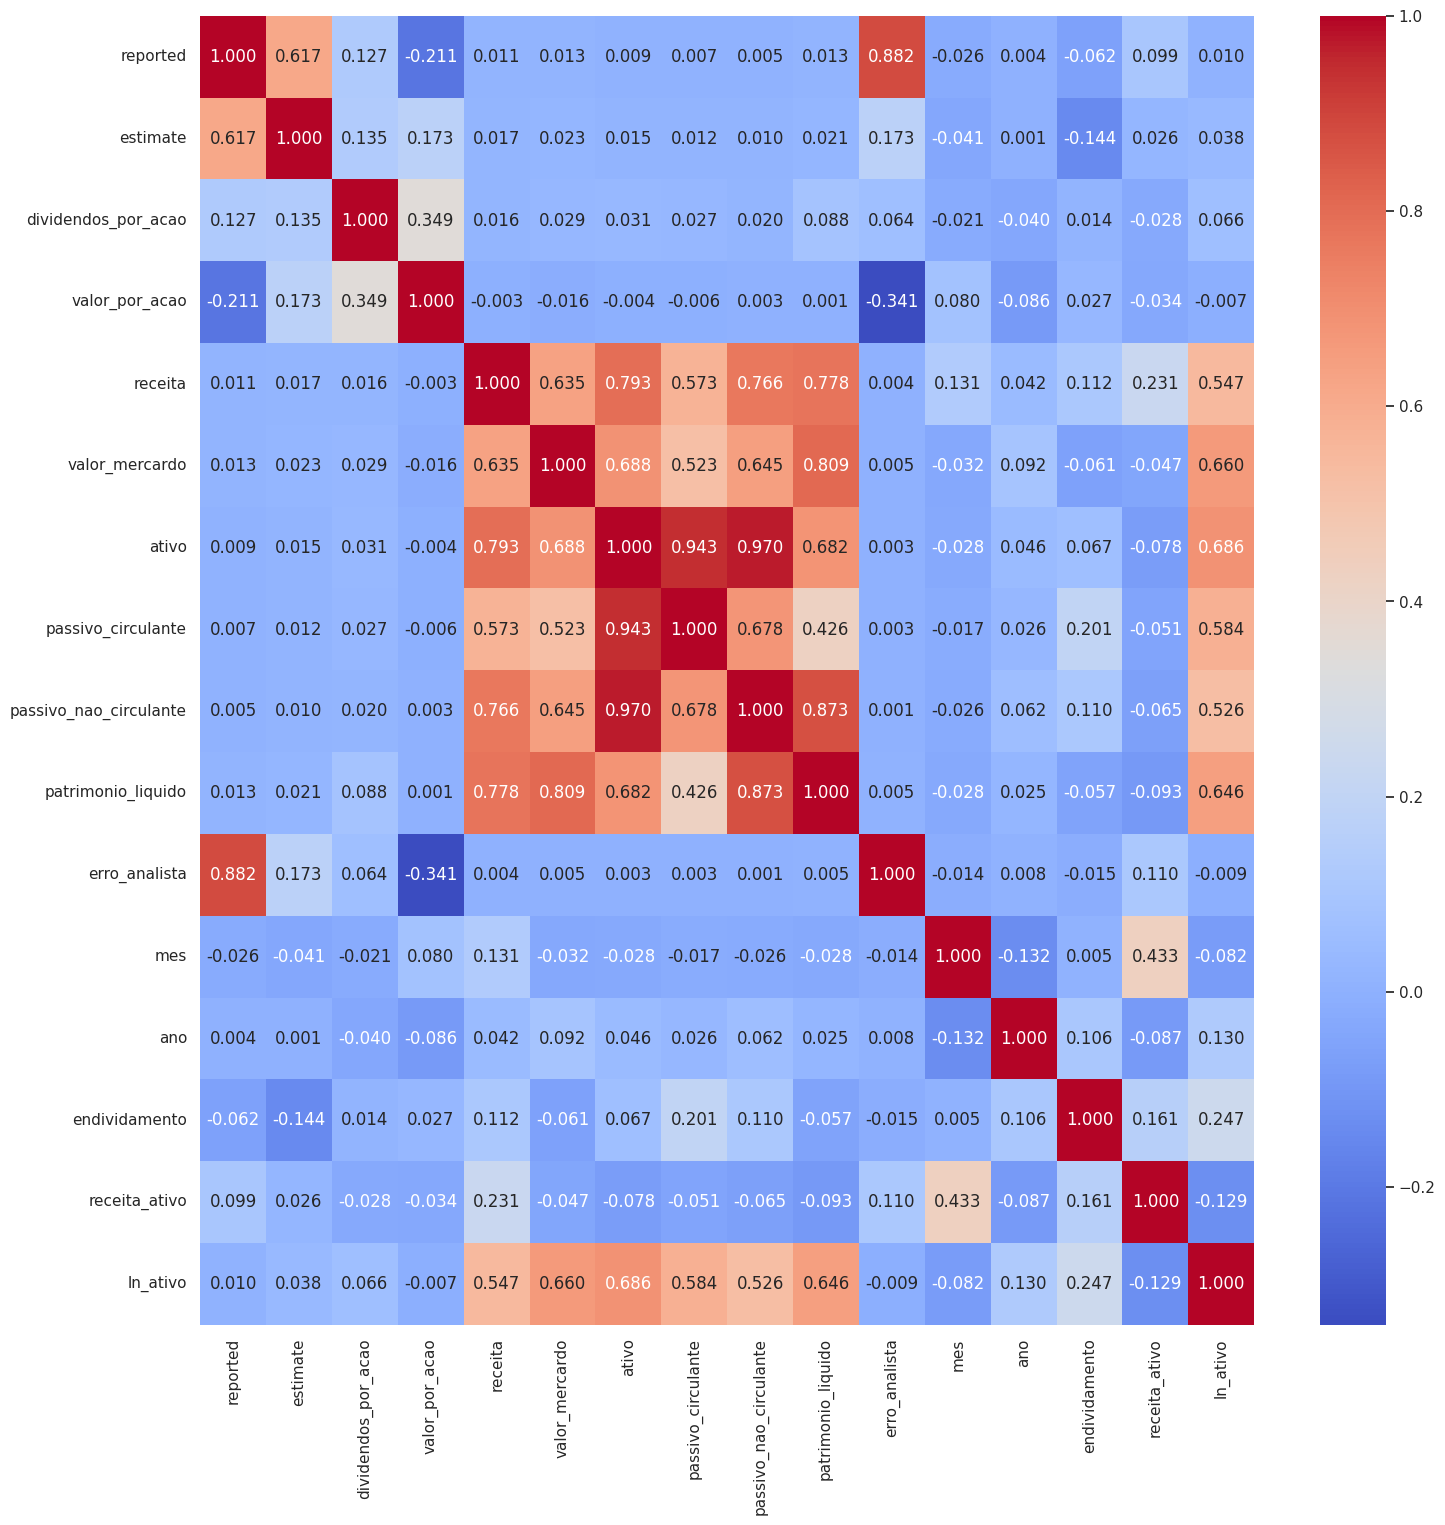

In [11]:
size = 17
sns.set(rc={'figure.figsize':(size, size)})
sns.heatmap(df.drop(['chave', 'codigo', 'data'], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

In [12]:
treated_df = df.copy(deep=True)
treated_df['dividendos_por_acao'] = treated_df['dividendos_por_acao'].fillna(0)
treated_df = treated_df.iloc[treated_df['reported'].dropna().index]
treated_df

,chave,codigo,data,reported,estimate,dividendos_por_acao,valor_por_acao,receita,valor_mercardo,ativo,passivo_circulante,passivo_nao_circulante,patrimonio_liquido,erro_analista,mes,ano,endividamento,receita_ativo,ln_ativo
0,AALR303/2017,AALR3,03/2017,0.058,0.080,0.0,10.306391,259277.0,1793917.0,2218670.0,429271.0,564989.0,1182905.0,-0.022,3,2017,0.448133,0.116861,14.612418
1,AALR303/2018,AALR3,03/2018,0.073,0.080,0.0,10.408744,263142.0,1902885.0,2274483.0,375351.0,631247.0,NaN,-0.007,3,2018,0.442561,0.115693,14.637263
2,AALR303/2019,AALR3,03/2019,0.084,0.110,0.0,10.697692,261845.0,1714254.0,2429751.0,407320.0,718936.0,NaN,-0.026,3,2019,0.463527,0.107766,14.703299
3,AALR306/2017,AALR3,06/2017,0.034,0.125,0.0,10.323341,529682.0,2070042.0,2270885.0,471114.0,539440.0,1218344.0,-0.091,6,2017,0.445004,0.233249,14.635680
4,AALR306/2018,AALR3,06/2018,0.032,0.070,0.0,10.462927,538706.0,1545946.0,2263315.0,404495.0,582234.0,NaN,-0.038,6,2018,0.435966,0.238016,14.632341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,YDUQ312/2015,YDUQ3,12/2015,0.176,0.334,0.0,8.709215,2939422.0,4293643.0,4360083.0,746183.0,933308.0,2680592.0,-0.158,12,2015,0.385197,0.674167,15.288002
4037,YDUQ312/2016,YDUQ3,12/2016,0.462,0.235,0.0,7.894572,3184505.0,4872688.0,4141152.0,937314.0,769165.0,NaN,0.227,12,2016,0.412078,0.768990,15.236485
4038,YDUQ312/2017,YDUQ3,12/2017,0.075,0.350,0.0,8.975281,3378979.0,10148502.0,4021095.0,842944.0,400894.0,NaN,-0.275,12,2017,0.309328,0.840313,15.207065
4039,YDUQ312/2018,YDUQ3,12/2018,0.054,0.460,0.0,8.634778,3619377.0,7130685.0,4102463.0,1289100.0,221954.0,2591409.0,-0.406,12,2018,0.368328,0.882245,15.227098


In [13]:
treated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3943 entries, 0 to 4040
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chave                   3943 non-null   object 
 1   codigo                  3943 non-null   object 
 2   data                    3943 non-null   object 
 3   reported                3943 non-null   float64
 4   estimate                3943 non-null   float64
 5   dividendos_por_acao     3943 non-null   float64
 6   valor_por_acao          3800 non-null   float64
 7   receita                 3527 non-null   float64
 8   valor_mercardo          3826 non-null   float64
 9   ativo                   3764 non-null   float64
 10  passivo_circulante      3754 non-null   float64
 11  passivo_nao_circulante  3570 non-null   float64
 12  patrimonio_liquido      2562 non-null   float64
 13  erro_analista           3943 non-null   float64
 14  mes                     3943 non-null   int64

# Checando outliers pós-tratamento

In [14]:
treated_outliers_df = pd.DataFrame([treated_df[col].map(lambda x: is_outlier(x, col)) for col in treated_df.drop(['chave', 'codigo', 'data'], axis=1).columns]).transpose()
treated_outliers_df

,reported,estimate,dividendos_por_acao,valor_por_acao,receita,valor_mercardo,ativo,passivo_circulante,passivo_nao_circulante,patrimonio_liquido,erro_analista,mes,ano,endividamento,receita_ativo,ln_ativo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
treated_outliers_df.describe(percentiles=[0.01, 0.99])

,reported,estimate,dividendos_por_acao,valor_por_acao,receita,valor_mercardo,ativo,passivo_circulante,passivo_nao_circulante,patrimonio_liquido,erro_analista,mes,ano,endividamento,receita_ativo,ln_ativo
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.0,3943.0,3943.000000,3943.000000,3943.000000
mean,-0.001775,-0.002536,0.001775,0.004311,0.015724,0.029673,0.033731,0.026629,0.012173,0.014963,-0.000761,0.0,0.0,0.007101,0.014710,0.001014
std,0.065646,0.067526,0.042102,0.065528,0.124422,0.169705,0.180558,0.161018,0.109674,0.121421,0.052819,0.0,0.0,0.083979,0.120403,0.031838
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
99%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000


# Correlações pós-tratamento

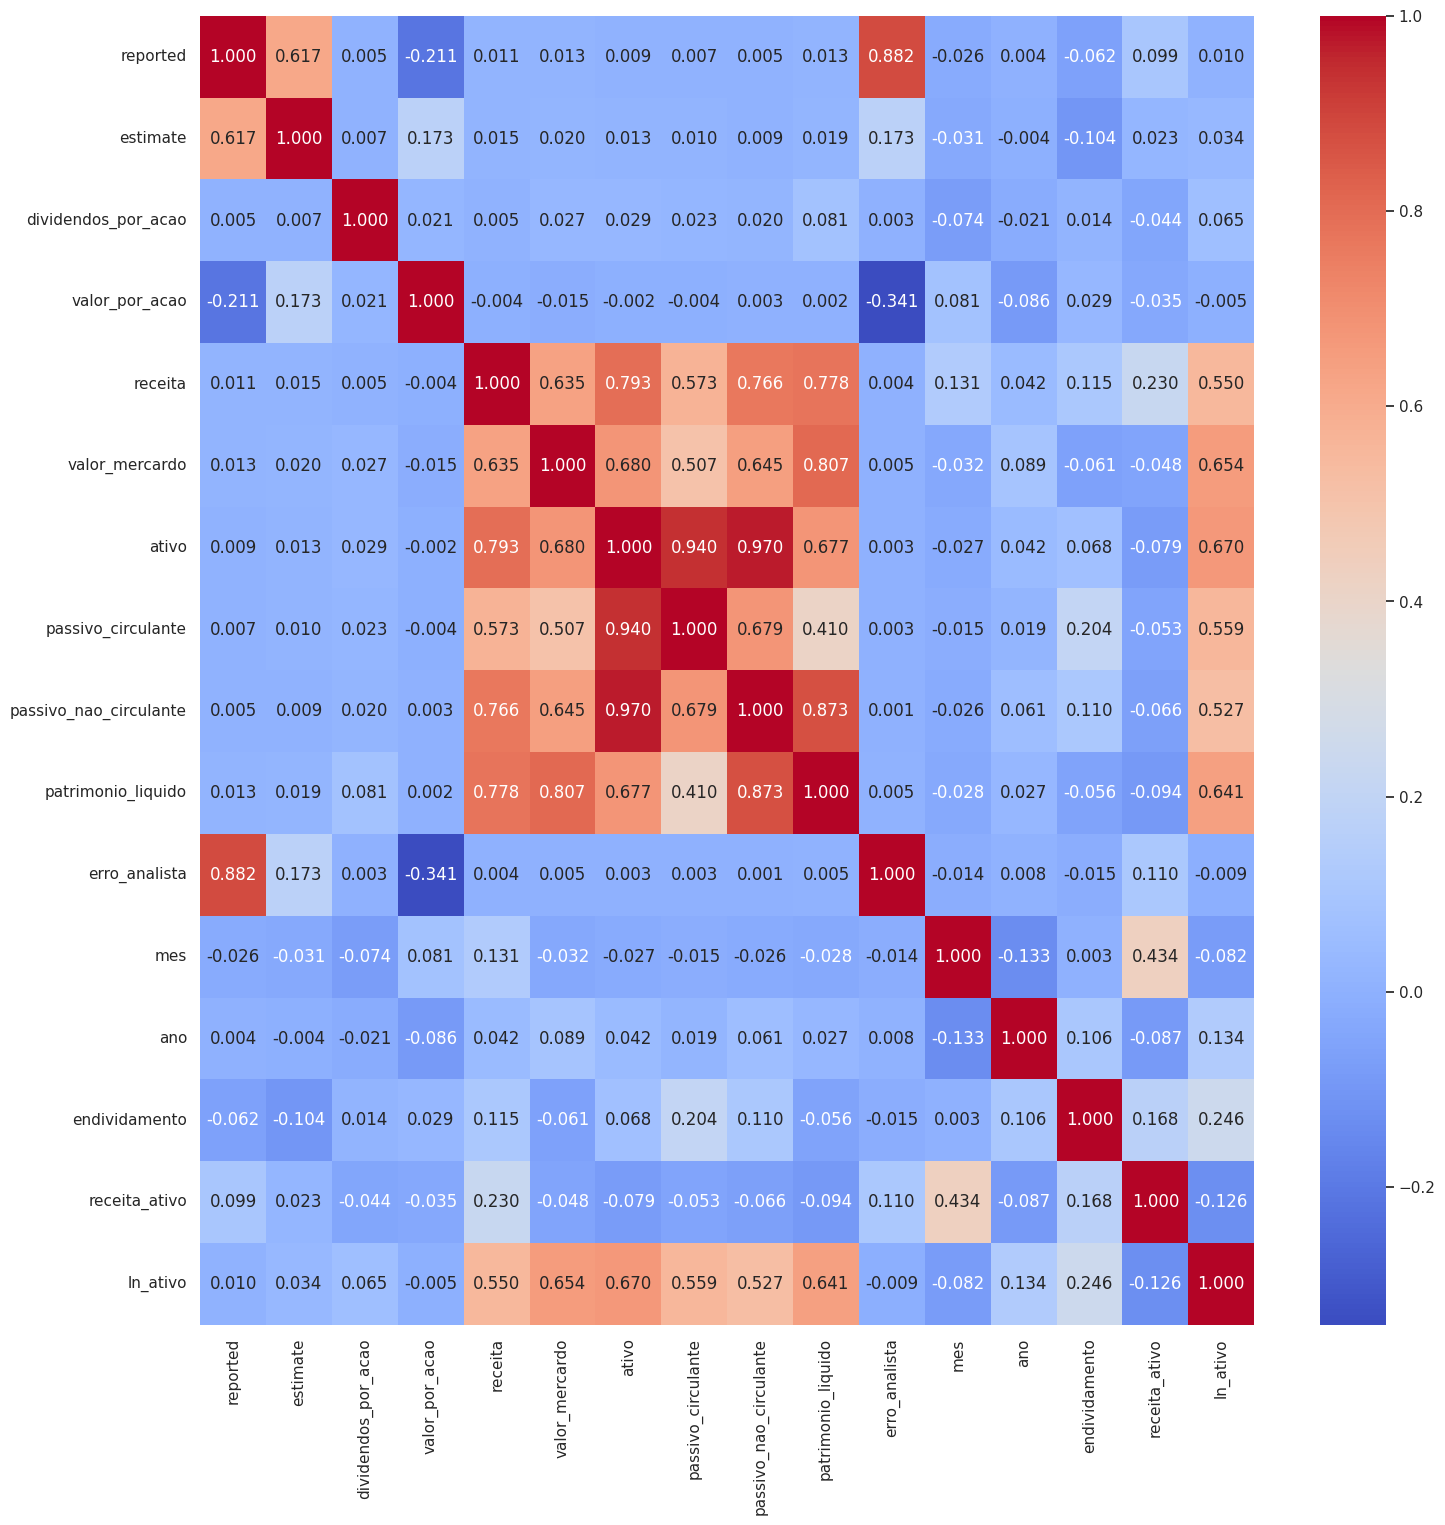

In [16]:
size = 17
sns.set(rc={'figure.figsize':(size, size)})
sns.heatmap(treated_df.drop(['chave', 'codigo', 'data'], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

# Colunas para prever o erro:

In [17]:
variable_columns = ['dividendos_por_acao', 'valor_por_acao', 'endividamento', 'receita_ativo', 'ln_ativo']
target_column = 'erro_analista'

In [18]:
model_df = treated_df[variable_columns+[target_column]].copy()
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3943 entries, 0 to 4040
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dividendos_por_acao  3943 non-null   float64
 1   valor_por_acao       3800 non-null   float64
 2   endividamento        3570 non-null   float64
 3   receita_ativo        3527 non-null   float64
 4   ln_ativo             3764 non-null   float64
 5   erro_analista        3943 non-null   float64
dtypes: float64(6)
memory usage: 344.7 KB


# Removendo nulls

In [19]:
model_df.dropna(inplace=True)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3475 entries, 0 to 4040
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dividendos_por_acao  3475 non-null   float64
 1   valor_por_acao       3475 non-null   float64
 2   endividamento        3475 non-null   float64
 3   receita_ativo        3475 non-null   float64
 4   ln_ativo             3475 non-null   float64
 5   erro_analista        3475 non-null   float64
dtypes: float64(6)
memory usage: 190.0 KB


# Checando outliers nas colunas de interesse

In [20]:
model_outliers_df = pd.DataFrame([model_df[col].map(lambda x: is_outlier(x, col)) for col in model_df.columns]).transpose()
model_outliers_df.describe(percentiles=[0.01, 0.99])

,dividendos_por_acao,valor_por_acao,endividamento,receita_ativo,ln_ativo,erro_analista
count,3475.000000,3475.000000,3475.0,3475.000000,3475.0,3475.000000
mean,0.001727,0.004892,0.0,0.016403,0.0,-0.000863
std,0.041523,0.069782,0.0,0.127037,0.0,0.050891
min,0.000000,0.000000,0.0,0.000000,0.0,-1.000000
1%,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.0,0.000000,0.0,0.000000
99%,0.000000,0.000000,0.0,1.000000,0.0,0.000000
max,1.000000,1.000000,0.0,1.000000,0.0,1.000000


# Correlações de interesse

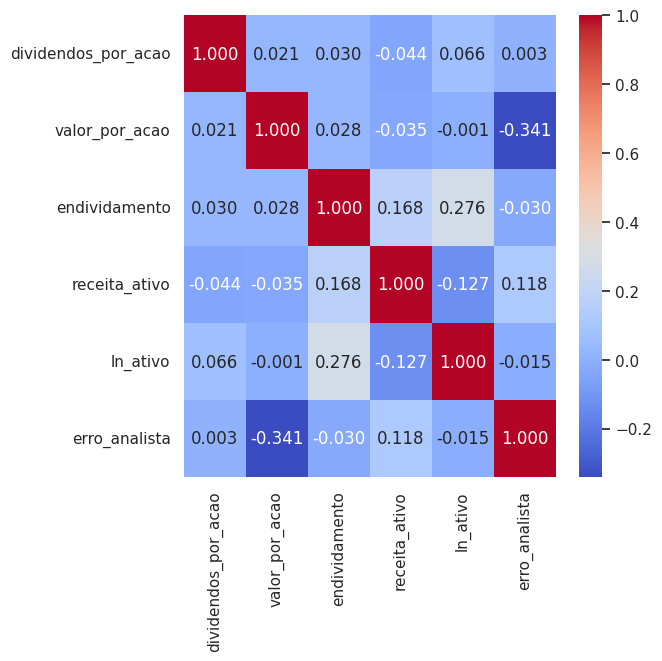

In [21]:
size = 6
sns.set(rc={'figure.figsize':(size, size)})
sns.heatmap(model_df.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

# Regressão sem winsorização

In [22]:
x = model_df[variable_columns]
x = smf.add_constant(x)
smf.regression.linear_model.OLS(model_df[target_column], x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          erro_analista   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          7.06e-102
Time:                        15:54:30   Log-Likelihood:                -16381.
No. Observations:                3475   AIC:                         3.277e+04
Df Residuals:                    3469   BIC:                         3.281e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.8326      5.335     -0.344      0.731     -12.292       8.627
dividendos_por_acao     0.5356      0.553      0.968      0.333      -0.549       1.620
valor_por_acao         -0.0711      0.003    -21.187      0.000      -0.078      -0.065
endividamento          -6.9619      2.692     -2.586      0.010     -12.240      -1.684
receita_ativo           8.4642      1.193      7.094      0.000       6.125      10.804
ln_ativo                0.2098      0.341      0.615      0.539      -0.459       0.879
==============================================================================
Omnibus:                     6326.268   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         73275284.143
Skew:                          12.228   Prob(JB):                         0.00
Kurtosis:                     713.968   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Winsorizando dados de interesse

In [23]:
wins_model_df = pd.DataFrame([sp.stats.mstats.winsorize(model_df[col], limits=[0.02, 0.02]) for col in model_df.columns]).transpose()
wins_model_df.columns = model_df.columns
wins_model_df

,dividendos_por_acao,valor_por_acao,endividamento,receita_ativo,ln_ativo,erro_analista
0,0.0,10.306391,0.448133,0.116861,14.612418,-0.022
1,0.0,10.408744,0.442561,0.115693,14.637263,-0.007
2,0.0,10.697692,0.463527,0.107766,14.703299,-0.026
3,0.0,10.323341,0.445004,0.233249,14.635680,-0.091
4,0.0,10.462927,0.435966,0.238016,14.632341,-0.038
...,...,...,...,...,...,...
3470,0.0,8.709215,0.385197,0.674167,15.288002,-0.158
3471,0.0,7.894572,0.412078,0.768990,15.236485,0.227
3472,0.0,8.975281,0.309328,0.840313,15.207065,-0.275
3473,0.0,8.634778,0.368328,0.882245,15.227098,-0.406


In [24]:
wins_outlier_model_df = pd.DataFrame([wins_model_df[col].map(lambda x: is_outlier(x, col)) for col in wins_model_df.columns]).transpose()
wins_outlier_model_df.describe(percentiles=[0.01, 0.99])

,dividendos_por_acao,valor_por_acao,endividamento,receita_ativo,ln_ativo,erro_analista
count,3475.0,3475.0,3475.0,3475.0,3475.0,3475.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
1%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
99%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


# Correlação pós-winsorização

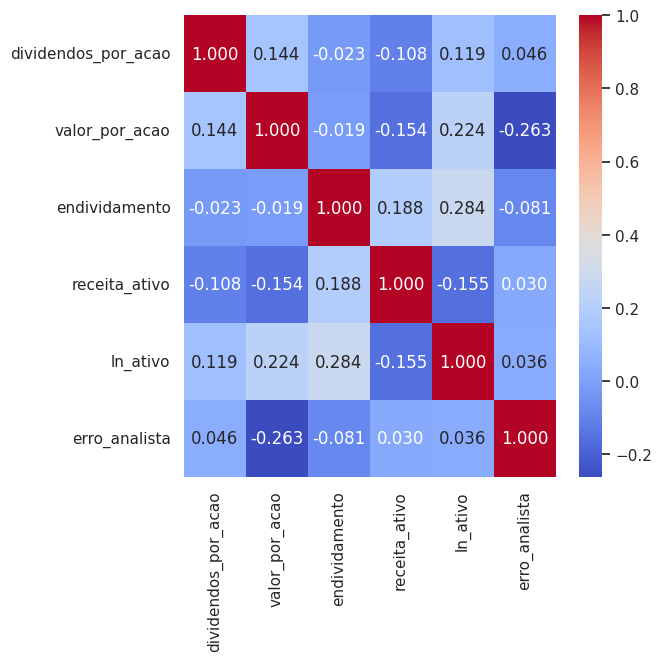

In [25]:
size = 6
sns.set(rc={'figure.figsize':(size, size)})
sns.heatmap(wins_model_df.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

# Regressão pós-winsorização

In [26]:
x = wins_model_df[variable_columns]
x = smf.add_constant(x)
smf.regression.linear_model.OLS(wins_model_df[target_column], x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          erro_analista   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     76.13
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           6.37e-76
Time:                        15:54:32   Log-Likelihood:                -1731.9
No. Observations:                3475   AIC:                             3476.
Df Residuals:                    3469   BIC:                             3513.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4839      0.083     -5.802      0.000      -0.647      -0.320
dividendos_por_acao     0.1687      0.038      4.475      0.000       0.095       0.243
valor_por_acao         -0.0096      0.001    -17.898      0.000      -0.011      -0.009
endividamento          -0.3076      0.041     -7.514      0.000      -0.388      -0.227
receita_ativo           0.0483      0.022      2.221      0.026       0.006       0.091
ln_ativo                0.0420      0.005      7.731      0.000       0.031       0.053
==============================================================================
Omnibus:                      923.090   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8745.311
Skew:                          -0.987   Prob(JB):                         0.00
Kurtosis:                      10.517   Cond. No.                         272.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Comparando os valores

In [27]:
coef = {
  'const': -1.8326,
  'dividendos_por_acao': 0.5356, # nao significativo
  'valor_por_acao': -0.0711	,
  'endividamento': -6.9619,
  'receita_ativo': 8.4642,
  'ln_ativo': 0.2098, # nao significativo
}
coef_wins = {
  'const': -0.4839,
  'dividendos_por_acao': 0.1687,
  'valor_por_acao': -0.0096,
  'endividamento': -0.3076,
  'receita_ativo': 0.0483,
  'ln_ativo': 0.0420,
}
compare_df = treated_df[['erro_analista']].copy()
compare_df['erro_analista_previsto'] = (
  coef['const']
  + treated_df['valor_por_acao'] * coef['valor_por_acao']
  + treated_df['endividamento'] * coef['endividamento']
  + treated_df['receita_ativo'] * coef['receita_ativo']
)
compare_df['erro_analista_previsto_wins'] = (
  coef_wins['const']
  + treated_df['dividendos_por_acao'] * coef_wins['dividendos_por_acao']
  + treated_df['valor_por_acao'] * coef_wins['valor_por_acao']
  + treated_df['endividamento'] * coef_wins['endividamento']
  + treated_df['receita_ativo'] * coef_wins['receita_ativo']
  + treated_df['ln_ativo'] * coef_wins['ln_ativo']
)
compare_df['erro_analista_previsto_percentual'] = (compare_df['erro_analista'] - compare_df['erro_analista_previsto'])/compare_df['erro_analista']
compare_df['erro_analista_previsto_percentual_wins'] = (compare_df['erro_analista'] - compare_df['erro_analista_previsto_wins'])/compare_df['erro_analista']
compare_df

,erro_analista,erro_analista_previsto,erro_analista_previsto_wins,erro_analista_previsto_percentual,erro_analista_previsto_percentual_wins
0,-0.022,-4.696105,-0.101321,-212.459326,-3.605508
1,-0.007,-4.674479,-0.099603,-666.782739,-13.228963
2,-0.026,-4.908082,-0.106435,-187.772396,-3.093661
3,-0.091,-3.690399,-0.093923,-39.553833,-0.032120
4,-0.038,-3.597050,-0.092393,-93.659201,-1.431390
...,...,...,...,...,...
4036,-0.158,0.572752,-0.011337,4.625012,0.928248
4037,0.227,1.246134,-0.009369,-4.489577,1.041271
4038,-0.275,2.488324,0.014072,10.048452,1.051170
4039,-0.406,2.456698,0.002059,7.050981,1.005071


In [28]:
compare_df[['erro_analista', 'erro_analista_previsto', 'erro_analista_previsto_wins']].describe()

,erro_analista,erro_analista_previsto,erro_analista_previsto_wins
count,3943.000000,3475.000000,3475.000000
mean,-0.385183,-3.814758,-0.137821
std,28.409783,10.431705,1.320635
min,-711.671000,-282.408289,-37.734299
25%,-0.090000,-5.274050,-0.089688
50%,-0.008000,-3.782639,-0.038020
75%,0.039000,-1.871675,0.003104
max,941.643000,25.926172,5.693798


In [29]:
compare_df[['erro_analista']][compare_df['erro_analista'] == 0].count()

erro_analista    44
dtype: int64

In [30]:
compare_df[compare_df['erro_analista'] != 0].describe()

,erro_analista,erro_analista_previsto,erro_analista_previsto_wins,erro_analista_previsto_percentual,erro_analista_previsto_percentual_wins
count,3899.000000,3435.000000,3435.000000,3435.000000,3435.000000
mean,-0.389529,-3.837638,-0.139572,8.887474,1.145505
std,28.569646,10.483527,1.328184,732.881701,12.687730
min,-711.671000,-282.408289,-37.734299,-11866.394828,-263.611669
25%,-0.093000,-5.284416,-0.090286,-54.798589,0.258463
50%,-0.009000,-3.795346,-0.038571,-3.080365,0.953774
75%,0.041000,-1.893495,0.002495,40.334962,1.722072
max,941.643000,25.926172,5.693798,12598.708104,207.147682
